# Wisconsin Breast Cancer : Using Decision Trees

#### Name: Jayoti Thakur
#### Student Id : 100892138    
 

In [110]:
#import libraries

import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

import warnings
warnings.filterwarnings('ignore')





# Exploratory Data Analysis

In [111]:
#Import Data

File = "wdbc.data"

column_names = ["ID", "Diagnosis", "Mean Radius", "Mean Texture", "Mean Perimeter", "Mean Area", "Mean Smoothness",
                "Mean Compactness", "Mean Concavity", "Mean Concave Points", "Mean Symmetry", "Mean Fractal Dimension",
                "SE Radius", "SE Texture", "SE Perimeter", "SE Area", "SE Smoothness", "SE Compactness",
                "SE Concavity", "SE Concave Points", "SE Symmetry", "SE Fractal Dimension", "Worst Radius",
                "Worst Texture", "Worst Perimeter", "Worst Area", "Worst Smoothness", "Worst Compactness",
                "Worst Concavity", "Worst Concave Points", "Worst Symmetry", "Worst Fractal Dimension"]

dataset = pd.read_csv(File, header=None, names=column_names, sep=',')


In [112]:
dataset.shape

(569, 32)

In [113]:
dataset.head()

,ID,Diagnosis,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [114]:
dataset.describe()

,ID,Mean Radius,Mean Texture,Mean Perimeter,Mean Area,Mean Smoothness,Mean Compactness,Mean Concavity,Mean Concave Points,Mean Symmetry,...,Worst Radius,Worst Texture,Worst Perimeter,Worst Area,Worst Smoothness,Worst Compactness,Worst Concavity,Worst Concave Points,Worst Symmetry,Worst Fractal Dimension
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [115]:
# Check for missing values
dataset.isnull().sum()


ID                         0
Diagnosis                  0
Mean Radius                0
Mean Texture               0
Mean Perimeter             0
Mean Area                  0
Mean Smoothness            0
Mean Compactness           0
Mean Concavity             0
Mean Concave Points        0
Mean Symmetry              0
Mean Fractal Dimension     0
SE Radius                  0
SE Texture                 0
SE Perimeter               0
SE Area                    0
SE Smoothness              0
SE Compactness             0
SE Concavity               0
SE Concave Points          0
SE Symmetry                0
SE Fractal Dimension       0
Worst Radius               0
Worst Texture              0
Worst Perimeter            0
Worst Area                 0
Worst Smoothness           0
Worst Compactness          0
Worst Concavity            0
Worst Concave Points       0
Worst Symmetry             0
Worst Fractal Dimension    0
dtype: int64

In [116]:
dataset.Diagnosis.unique()

array(['M', 'B'], dtype=object)

<AxesSubplot:xlabel='Diagnosis', ylabel='count'>

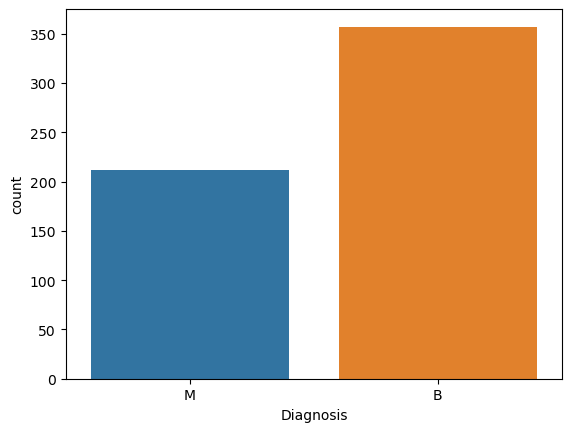

In [117]:
# Check the class distribution
sns.countplot(x='Diagnosis', data=dataset)

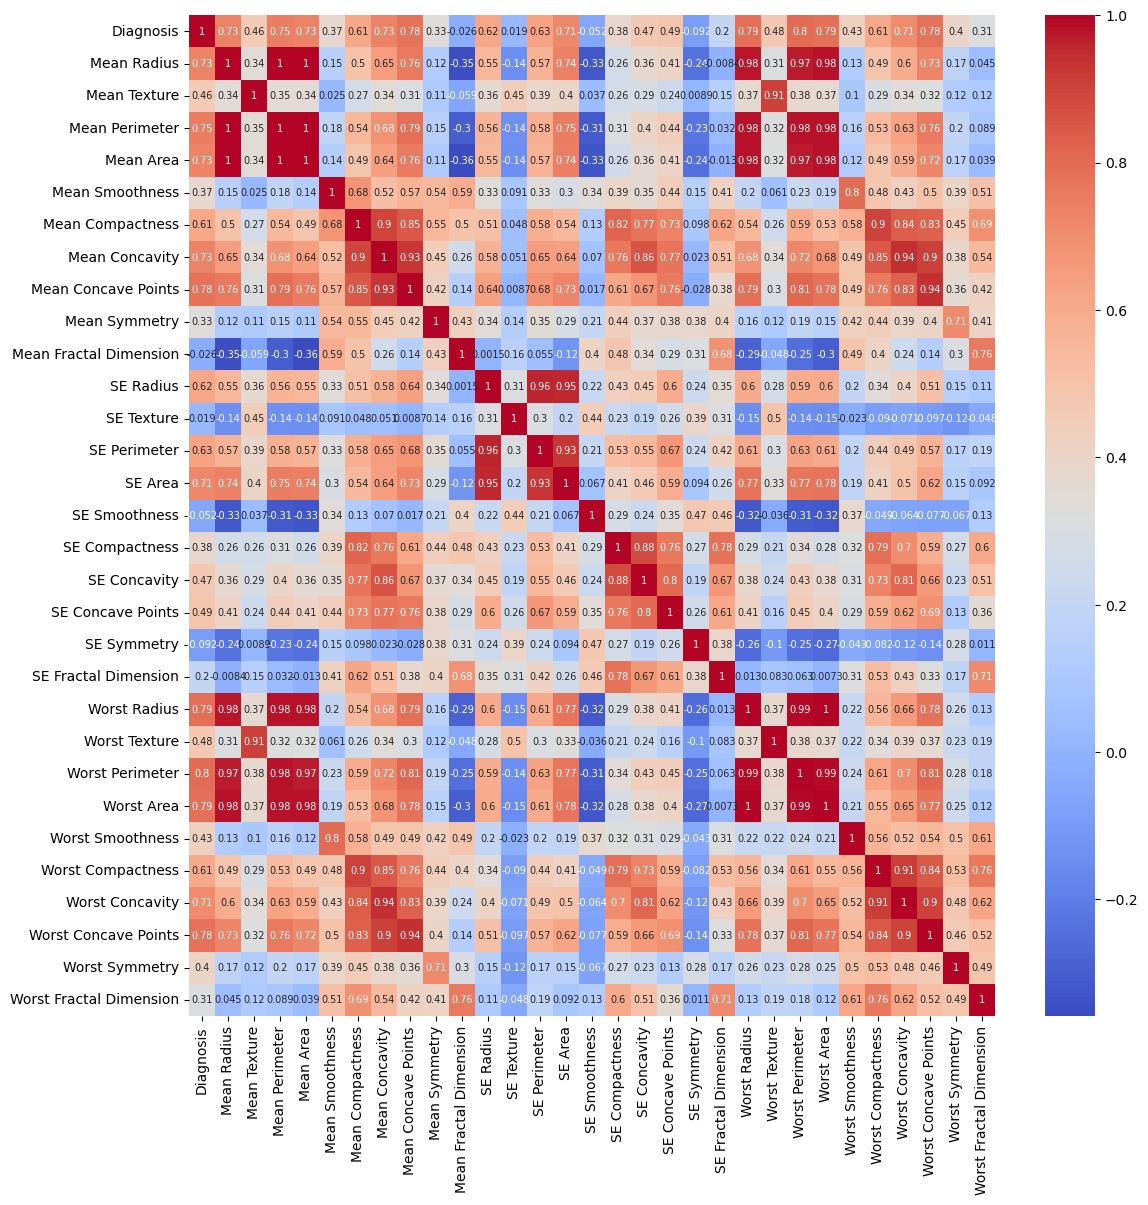

In [118]:
# Convert diagnosis column to binary values
dataset['Diagnosis'] = dataset['Diagnosis'].map({'M': 1, 'B': 0})

# Remove id column
dataset.drop(['ID'], axis=1, inplace=True)

# Compute Spearman's correlation coefficient
corr = dataset.corr(method='spearman')

# Plot heatmap of correlations
fig, ax = plt.subplots(figsize=(13, 13))
sns.heatmap(corr, cmap='coolwarm', annot=True, annot_kws={"size": 7})
plt.show()

In [119]:
# Handle null values
dataset.dropna(inplace=True)

In [120]:
# Filter data to include only non-empty categories in the 'Diagnosis' column
non_empty_categories = df['Diagnosis'].unique()
df_filtered = df[df['Diagnosis'].isin(non_empty_categories)]

<AxesSubplot:xlabel='Diagnosis', ylabel='Mean Area'>

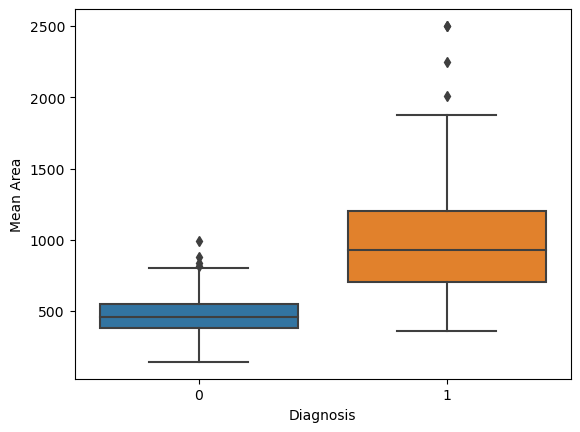

In [121]:
# Check for outliers
sns.boxplot(x='Diagnosis', y='Mean Area', data=dataset)

In [122]:
# Remove Outlier

Q1 = dataset['Mean Area'].quantile(0.25)
Q3 = dataset['Mean Area'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

dataset = dataset[(dataset['Mean Area'] >= lower_bound) & (dataset['Mean Area'] <= upper_bound)]


# Model Training 

#### Decision Trees

In [123]:
# Train Decision Tree classifier using training data
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

# Predict class labels for testing data using trained classifier
y_pred = dt.predict(X_test)

# Evaluate performance of classifier
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion matrix:\n", confusion)

Accuracy: 0.926605504587156
Precision: 0.9534883720930233
Recall: 0.8723404255319149
F1-score: 0.9111111111111112
Confusion matrix:
 [[60  2]
 [ 6 41]]


## Conclusion

### Accuracy of approximately 92.66%, indicating that it correctly classified 92.66% of the instances in the dataset.

### Precision of approximately 95.35%, indicating that out of all the instances it predicted as positive, around 95.35% were actually positive.

### Recall of approximately 87.23%, meaning it correctly identified around 87.23% of the actual positive instances

### F1-score is approximately 91.11%, reflecting a balance between precision and recall.

### The confusion matrix is [[60 2] [6 41]]:
#### 60 instances were correctly predicted as negative (true negatives).
#### 2 instances were incorrectly predicted as positive (false positives).
#### 6 instances were incorrectly predicted as negative (false negatives).
#### 41 instances were correctly predicted as positive (true positives).


# Hyper parameter tuning

#### Hyper parameter tuning Random Forest with Grid Search Cross Validation

In [109]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2', None]
}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Perform Grid Search CV to find the best hyperparameters
grid_search = GridSearchCV(rf, param_grid=param_grid, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and accuracy score
print("Best Hyperparameters:", grid_search.best_params_)
print("Accuracy:", grid_search.best_score_)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Accuracy: 0.9701149425287356



### The accuracy of approximately 97.01% indicates that the model correctly classified 97.01% of the instances in the dataset.